<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/autoencoder/CNN_AUTOENCODER_ver_FID_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 라이브러리 설정
from __future__ import absolute_import, division, print_function
import os

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import cv2
import gc
import glob

In [3]:
#import for fid score 

!pip install import_ipynb 
import import_ipynb
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/') #fid 소스파일 경로
import fid  

#from scipy.misc import imread   미제...

def calculate_fid(act1, act2):
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=2ff7d6bc4a8faccdefe525721e62f38c6915aed529d124e6007042bcee402197
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [4]:
from tensorflow.keras.layers import Reshape

# 랜덤 시드 고정
SEED=2021
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [5]:
minsu = glob.glob('./drive/MyDrive/videoimage3/*.png')
test_minsu = []
for _ in range(0,len(minsu)):
  img = cv2.imread(minsu[_])
  img = cv2.resize(img,(64,64))
  test_minsu.append(img.astype("float32")/255.0)
  
test_minsu = np.array(test_minsu)

print(test_minsu.shape)

(1912, 64, 64, 3)


In [7]:
# 오토인코더 모델 정의
def Autoencoder():
  #model = Sequnetial()

  X = tf.keras.layers.Input(shape=[64,64,3])

  #Encoder
  H = tf.keras.layers.Conv2D(32,(4,4),(2,2),activation='relu',padding='same')(X)
  H = tf.keras.layers.Conv2D(32*2,(4,4), (2,2),activation='relu',padding='same')(H)
  H = tf.keras.layers.Conv2D(32*4, (4,4),(2,2),activation='relu',padding='same')(H)
  H = tf.keras.layers.Conv2D(32*8, (4,4),(2,2),activation='relu',padding='same')(H)


  pool_tmp = H.shape.as_list()
  pool_tmp=pool_tmp[1:]
  

  #Fully-Connected
  H = tf.keras.layers.Flatten()(H)
  flatten_tmp=H.shape.as_list()
  flatten_tmp=flatten_tmp[1]
  H = tf.keras.layers.Dense(300,activation='relu')(H)
  H = tf.keras.layers.Dense(flatten_tmp,activation='relu')(H)
  H = Reshape(pool_tmp)(H)


  #Decoder
  H = tf.keras.layers.Conv2DTranspose(32*4,(2,2),strides=(2,2),padding='same',activation='relu')(H)
  H = tf.keras.layers.Conv2DTranspose(32*2,(2,2),strides=(2,2),padding='same',activation='relu')(H)
  H = tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same',activation='relu')(H)
  H = tf.keras.layers.Conv2DTranspose(3,(2,2),strides=(2,2),padding='same',activation='sigmoid')(H)

  model = tf.keras.models.Model(X,H)
  model.compile(optimizer='adam',loss='mean_squared_error', metrics=['acc'])

  return model

ae_model = Autoencoder()
ae_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 8, 8, 128)         131200    
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 4, 4, 256)         524544    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               122910

In [8]:
# 오토인코더 모델 학습
history = ae_model.fit(test_minsu,
                       test_minsu,
                       batch_size=8,
                       epochs=20,
                       verbose=1,
                       )


Epoch 1/20
239/239 [==============================] - 26s 105ms/step - loss: 0.0351 - acc: 0.8128
Epoch 2/20
239/239 [==============================] - 24s 101ms/step - loss: 0.0081 - acc: 0.8674
Epoch 3/20
239/239 [==============================] - 23s 96ms/step - loss: 0.0047 - acc: 0.8931
Epoch 4/20
239/239 [==============================] - 22s 92ms/step - loss: 0.0035 - acc: 0.9105
Epoch 5/20
239/239 [==============================] - 22s 93ms/step - loss: 0.0029 - acc: 0.9209
Epoch 6/20
239/239 [==============================] - 23s 96ms/step - loss: 0.0025 - acc: 0.9257
Epoch 7/20
239/239 [==============================] - 22s 93ms/step - loss: 0.0023 - acc: 0.9302
Epoch 8/20
239/239 [==============================] - 23s 96ms/step - loss: 0.0020 - acc: 0.9337
Epoch 9/20
239/239 [==============================] - 23s 95ms/step - loss: 0.0019 - acc: 0.9356
Epoch 10/20
239/239 [==============================] - 22s 92ms/step - loss: 0.0019 - acc: 0.9360
Epoch 11/20
239/239 [======

In [9]:
#테스트 데이터 Prediction
ae_images = ae_model.predict(test_minsu)
ae_images.shape

(1912, 64, 64, 3)

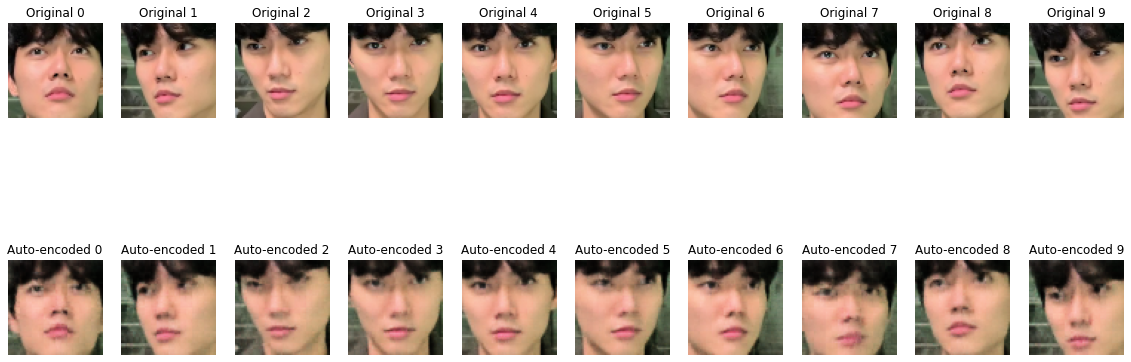

In [10]:
#이미지 출력
num = 10 
plt.figure(figsize=(20,8))

for i in range(10):
    # 원본 이미지
    ax = plt.subplot(2, num, i+1)
    plt.imshow(cv2.cvtColor(test_minsu[i*50], cv2.COLOR_BGR2RGB).reshape((64,64,3)))
    plt.title("Original %s" % str(i))
    plt.axis('off')
    
    # 복원 이미지
    ax = plt.subplot(2, num, i+num+1)
    plt.imshow(cv2.cvtColor(ae_images[i*50], cv2.COLOR_BGR2RGB).reshape((64,64,3)))
    plt.title("Auto-encoded %s" % str(i))
    plt.axis('off')
  
plt.show()

In [11]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid
 
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))


# define two collections of images
images1 = test_minsu
#images1 = images1.reshape((10,32,32,3))
images1 = images1.reshape((1912, 64, 64, 3))
images2 = ae_images
#images2 = images2.reshape((10,32,32,3))
print('Prepared', images1.shape, images2.shape)


# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')

# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images

images1 = preprocess_input(images1)
images2 = preprocess_input(images2)

# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)


Prepared (1912, 64, 64, 3) (1912, 64, 64, 3)
Scaled (1912, 299, 299, 3) (1912, 299, 299, 3)
FID (different): 0.294
